Differences between the distributions of the BDT training variables in data and MC could lead to reduced performance when applied to data. This is verified by comparing the distributions of the training variables in MC and signal weighted data.

In [1]:
from Data import LoadMC
import uproot

raw_vars = ["Lc_M", "p_TCHI2DOF", "pi_TCHI2DOF", "K_TCHI2DOF", "p_GHOSTPROB", "pi_P", "p_MINIPCHI2", "Lc_CHI2", "Lc_BPVFDCHI2", "p_PT", "pi_PT", "K_PT", "Lc_BPVDIRA", "p_PID_P", 'pi_GHOSTPROB', 'K_GHOSTPROB', 'Lc_DOCACHI2_12', 'Lc_DOCACHI2_13', 'Lc_DOCACHI2_23', 'pi_MINIPCHI2', 'K_MINIPCHI2']

mc = LoadMC(
    columns=raw_vars + ["Lc_BKGCAT"],
    cut="(Lc_BKGCAT<15) & (p_PID_P>-50)"
)


data = uproot.open("/data/lhcb/users/mackay/LcTraining/reduced/data_with_bdt.root:tree").arrays(raw_vars, library="pd")
sweights = uproot.open("/data/lhcb/users/mackay/LcTraining/reduced/fits/sweights/data_with_bdt_sweights.root:tree").arrays(["sweight"], library="pd")
data["sweight"] = sweights["sweight"]
data.head()


/data/lhcb/users/mackay/miniconda3/envs/pid_env/lib/python3.10/site-packages/uproot/interpretation/library.py:747: FutureWarning: Index.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if hasattr(index, "is_integer") and index.is_integer():


,Lc_M,p_TCHI2DOF,pi_TCHI2DOF,K_TCHI2DOF,p_GHOSTPROB,pi_P,p_MINIPCHI2,Lc_CHI2,Lc_BPVFDCHI2,p_PT,...,Lc_BPVDIRA,p_PID_P,pi_GHOSTPROB,K_GHOSTPROB,Lc_DOCACHI2_12,Lc_DOCACHI2_13,Lc_DOCACHI2_23,pi_MINIPCHI2,K_MINIPCHI2,sweight
0,2252.542480,0.509476,1.915858,1.543748,0.049143,34451.148438,326.016876,4.359706,1017.886780,2424.377686,...,0.999999,-37.620262,0.015952,0.006836,0.767948,3.057694,2.181825,381.295349,42.455685,-0.277809
1,2312.512451,1.355956,2.066417,1.469843,0.002954,12830.517578,186.585129,9.626221,2060.578857,3005.620361,...,0.999997,-24.772331,0.091706,0.002304,9.244286,1.993599,0.369681,80.094765,271.494446,-0.277039
2,2303.820068,1.564013,1.061220,1.467515,0.005713,22682.449219,23.184515,4.162400,117.451584,2110.386963,...,0.999967,6.502708,0.000619,0.029457,1.074792,0.544039,0.392127,11.034567,66.310219,-0.213608
3,2262.155273,1.507877,2.113145,1.436557,0.427505,17297.990234,101.556694,21.728807,391.201416,2676.126709,...,0.999993,31.641987,0.002850,0.019479,0.000018,17.941345,7.856304,203.126663,17.717255,-0.265534
4,2332.888916,1.415941,1.413418,0.974820,0.004655,25755.541016,241.191193,0.648395,871.332581,2188.786377,...,0.999999,-46.018745,0.006968,0.000167,0.202690,0.278806,0.295098,200.038712,76.242706,-0.277849


### Transform the variables

In [2]:
from TextFileHandling import ReadList
from Preprocess import TransformTheColumns
import os

transformed_variables = ReadList("{}/configs/training/test.txt".format(os.environ["BASE"]))
trf = TransformTheColumns(transformed_variables)

trf_data = trf.transform(data)
data[trf_data.columns] = trf_data[trf_data.columns]

trf_mc = trf.transform(mc)
mc[trf_mc.columns] = trf_mc[trf_mc.columns]

data = data.dropna()
mc = mc.dropna()

data.head()


INFO Parsing p_TCHI2DOF+K_TCHI2DOF+pi_TCHI2DOF using type sum and variables p_TCHI2DOF K_TCHI2DOF pi_TCHI2DOF 
INFO No definition for p_GHOSTPROB, using raw variable 
INFO No definition for pi_P, using raw variable 
INFO Parsing log(p_MINIPCHI2) using type log and variables p _ M I N I P C H I 2 
INFO No definition for Lc_CHI2, using raw variable 
INFO Parsing log(Lc_BPVFDCHI2) using type log and variables L c _ B P V F D C H I 2 
INFO Parsing asym(p_PT,pi_PT) using type asym and variables p_PT pi_PT 
INFO Parsing asym(p_PT,K_PT) using type asym and variables p_PT K_PT 
INFO Parsing log(Lc_BPVDIRA) using type log and variables L c _ B P V D I R A 


/data/lhcb/users/mackay/miniconda3/envs/pid_env/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


INFO Parsing p_GHOSTPROB+pi_GHOSTPROB+K_GHOSTPROB using type sum and variables p_GHOSTPROB pi_GHOSTPROB K_GHOSTPROB 
INFO Parsing p_MINIPCHI2+pi_MINIPCHI2+K_MINIPCHI2 using type sum and variables p_MINIPCHI2 pi_MINIPCHI2 K_MINIPCHI2 
INFO Parsing p_PT+K_PT+pi_PT using type sum and variables p_PT K_PT pi_PT 
INFO Parsing max(p_PT,K_PT,pi_PT) using type max and variables p_PT K_PT pi_PT 
INFO Parsing min(p_PT,K_PT,pi_PT) using type max and variables p_PT K_PT pi_PT 
INFO Parsing max(p_TCHI2DOF,K_TCHI2DOF,pi_TCHI2DOF) using type max and variables p_TCHI2DOF K_TCHI2DOF pi_TCHI2DOF 
INFO Parsing min(p_TCHI2DOF,K_TCHI2DOF,pi_TCHI2DOF) using type max and variables p_TCHI2DOF K_TCHI2DOF pi_TCHI2DOF 
INFO Parsing max(p_GHOSTPROB,K_GHOSTPROB,pi_GHOSTPROB) using type max and variables p_GHOSTPROB K_GHOSTPROB pi_GHOSTPROB 
INFO Parsing min(p_GHOSTPROB,K_GHOSTPROB,pi_GHOSTPROB) using type max and variables p_GHOSTPROB K_GHOSTPROB pi_GHOSTPROB 
INFO Parsing max(p_MINIPCHI2,K_MINIPCHI2,pi_MINIPCHI2) 

/data/lhcb/users/mackay/miniconda3/envs/pid_env/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


INFO Parsing asym(K_MINIPCHI2,pi_MINIPCHI2) using type asym and variables K_MINIPCHI2 pi_MINIPCHI2 
INFO Parsing p_TCHI2DOF+K_TCHI2DOF+pi_TCHI2DOF using type sum and variables p_TCHI2DOF K_TCHI2DOF pi_TCHI2DOF 
INFO No definition for p_GHOSTPROB, using raw variable 
INFO No definition for pi_P, using raw variable 
INFO Parsing log(p_MINIPCHI2) using type log and variables p _ M I N I P C H I 2 
INFO No definition for Lc_CHI2, using raw variable 
INFO Parsing log(Lc_BPVFDCHI2) using type log and variables L c _ B P V F D C H I 2 
INFO Parsing asym(p_PT,pi_PT) using type asym and variables p_PT pi_PT 
INFO Parsing asym(p_PT,K_PT) using type asym and variables p_PT K_PT 
INFO Parsing log(Lc_BPVDIRA) using type log and variables L c _ B P V D I R A 
INFO Parsing p_GHOSTPROB+pi_GHOSTPROB+K_GHOSTPROB using type sum and variables p_GHOSTPROB pi_GHOSTPROB K_GHOSTPROB 
INFO Parsing p_MINIPCHI2+pi_MINIPCHI2+K_MINIPCHI2 using type sum and variables p_MINIPCHI2 pi_MINIPCHI2 K_MINIPCHI2 
INFO Parsi

,Lc_M,p_TCHI2DOF,pi_TCHI2DOF,K_TCHI2DOF,p_GHOSTPROB,pi_P,p_MINIPCHI2,Lc_CHI2,Lc_BPVFDCHI2,p_PT,...,min_TCHI2DOF,max_GHOSTPROB,min_GHOSTPROB,max_MINIPCHI2,min_MINIPCHI2,lgsm_DOCACHI2,log_K_MINIPCHI2,log_pi_MINIPCHI2,lgnm_Lc_BPVDIRA,asym_K_pi_MINIPCHI2
0,2252.542480,0.509476,1.915858,1.543748,0.049143,34451.148438,326.016876,4.359706,1017.886780,2424.377686,...,1.915858,0.049143,0.049143,381.295349,381.295349,0.778691,1.627936,2.581261,-0.336518,-0.799620
1,2312.512451,1.355956,2.066417,1.469843,0.002954,12830.517578,186.585129,9.626221,2060.578857,3005.620361,...,2.066417,0.091706,0.091706,271.494446,271.494446,1.064741,2.433761,1.903604,-1.164870,0.544384
2,2303.820068,1.564013,1.061220,1.467515,0.005713,22682.449219,23.184515,4.162400,117.451584,2110.386963,...,1.564013,0.029457,0.029457,66.310219,66.310219,0.303403,1.821580,1.042755,-14.548158,0.714665
3,2262.155273,1.507877,2.113145,1.436557,0.427505,17297.990234,101.556694,21.728807,391.201416,2676.126709,...,2.113145,0.427505,0.427505,203.126663,203.126663,1.411580,1.248396,2.307767,-3.002783,-0.839550
4,2332.888916,1.415941,1.413418,0.974820,0.004655,25755.541016,241.191193,0.648395,871.332581,2188.786377,...,1.415941,0.006968,0.006968,241.191193,241.191193,-0.109806,1.882198,2.301114,-0.647150,-0.448079


### Compare sweighted data and MC

/data/lhcb/users/mackay/miniconda3/envs/pid_env/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/tmp/ipykernel_206661/1239545178.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6,4))


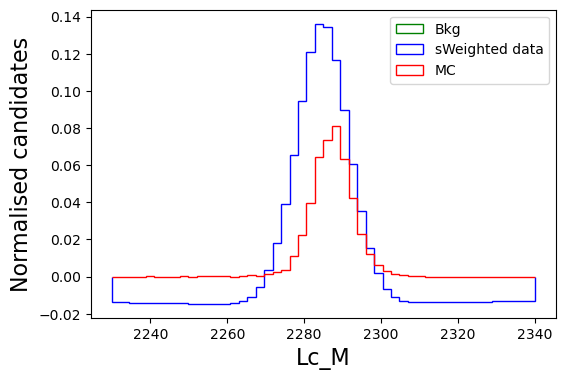

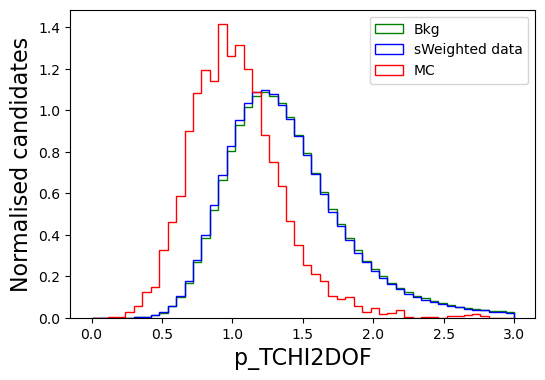

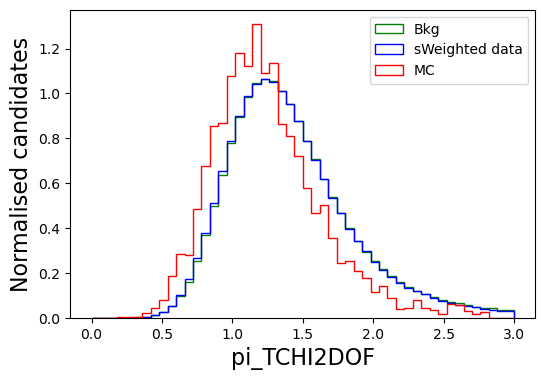

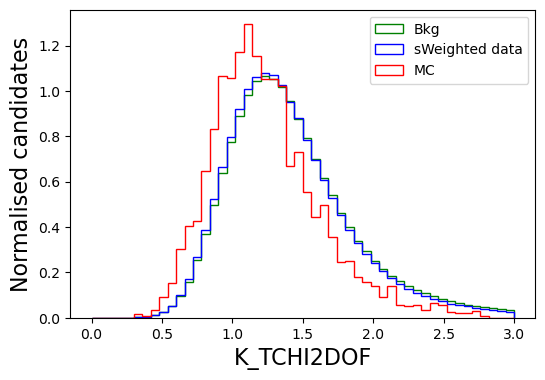

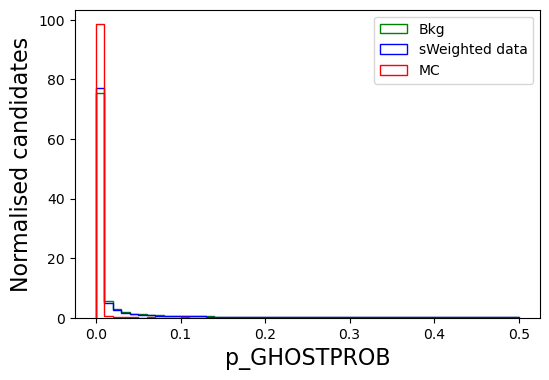

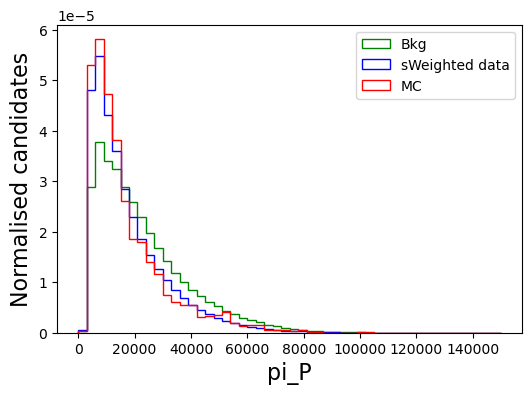

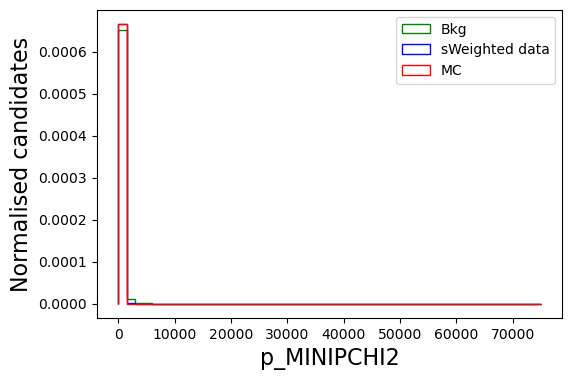

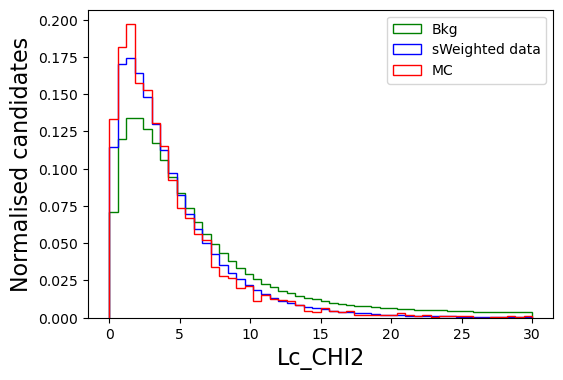

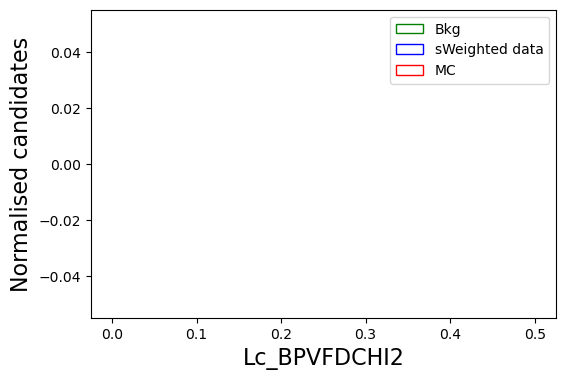

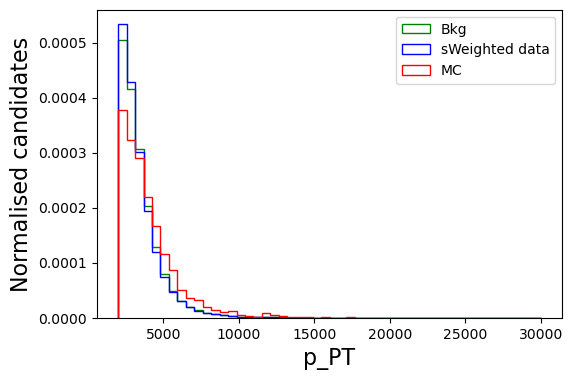

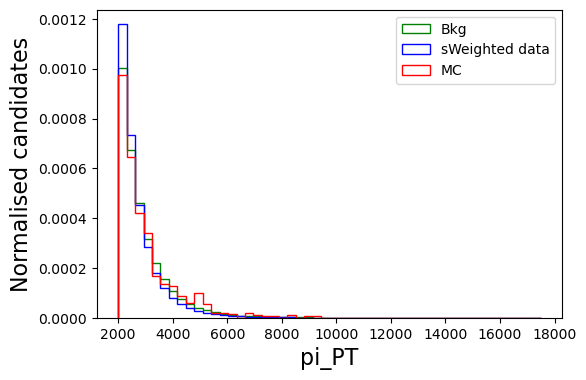

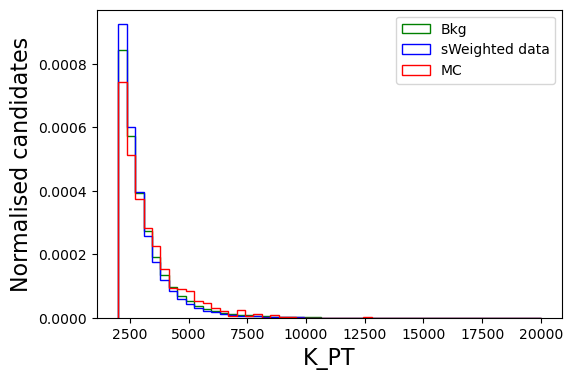

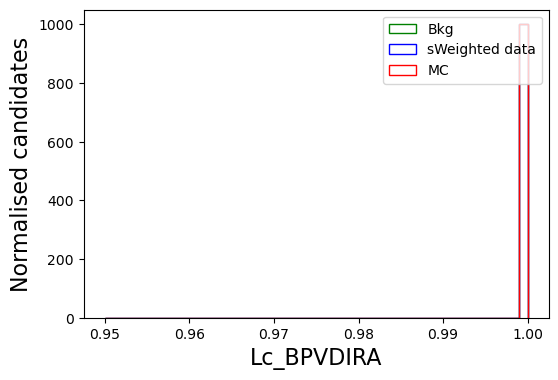

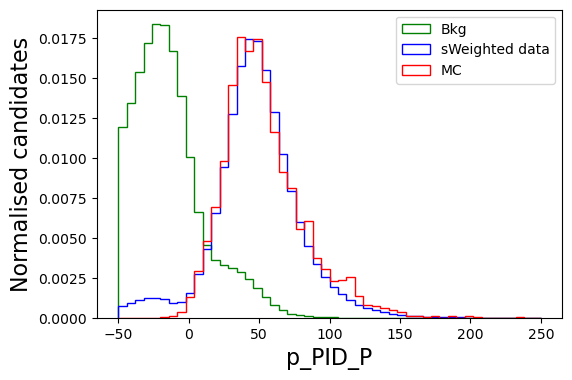

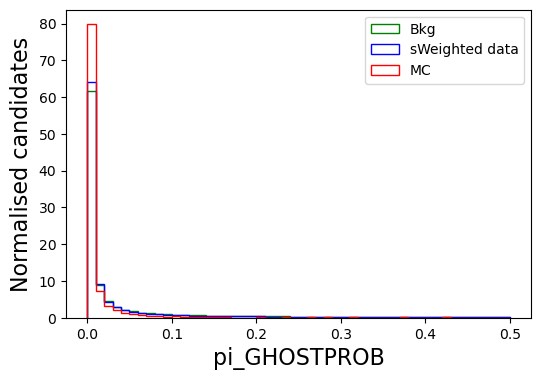

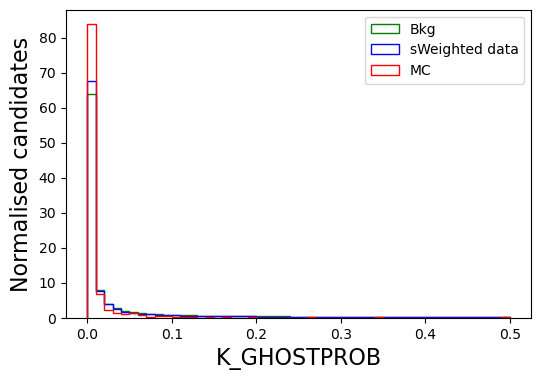

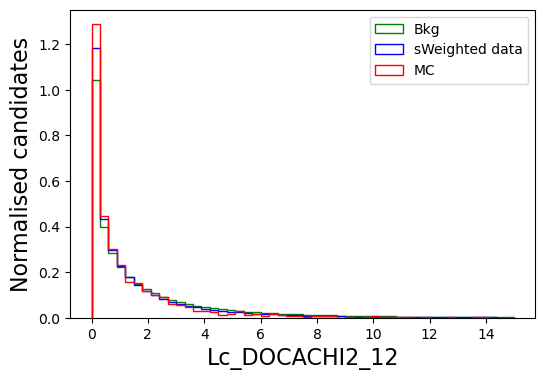

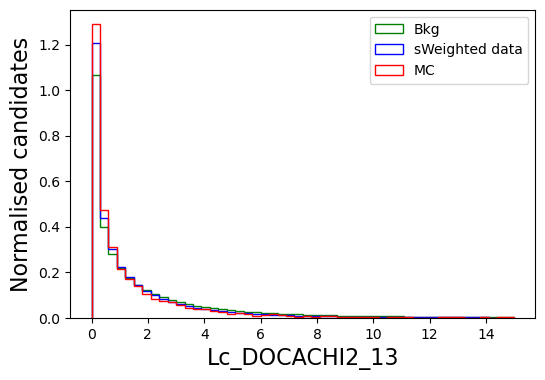

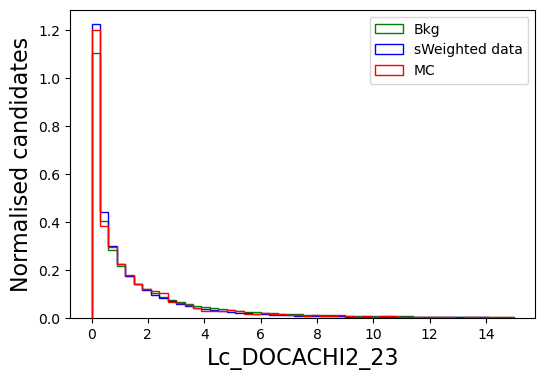

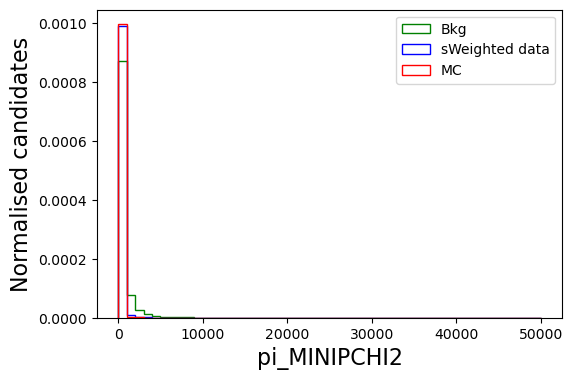

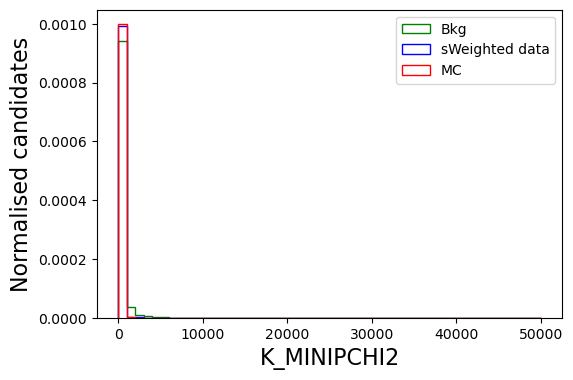

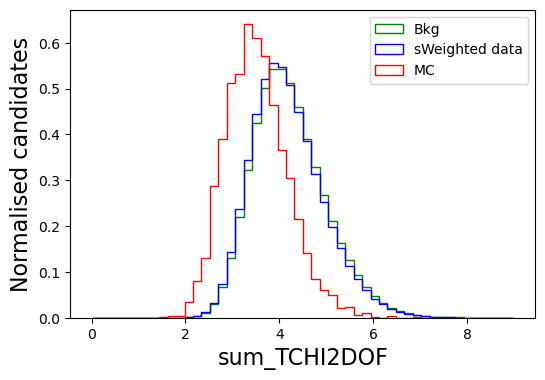

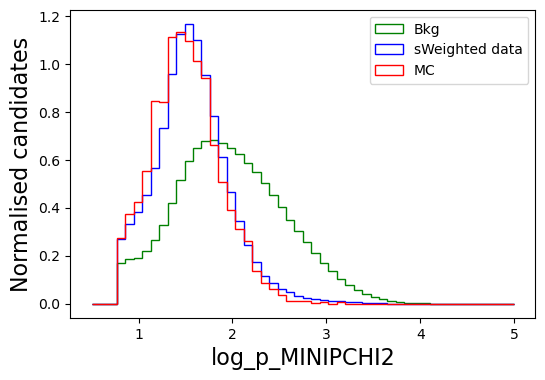

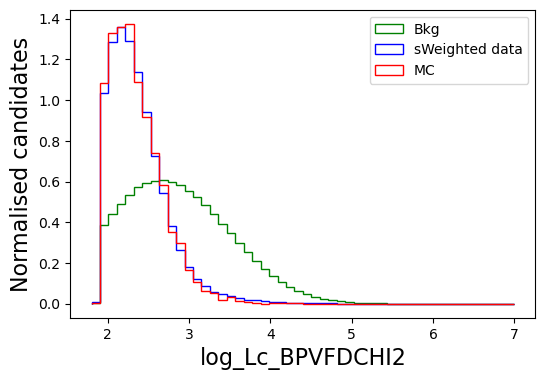

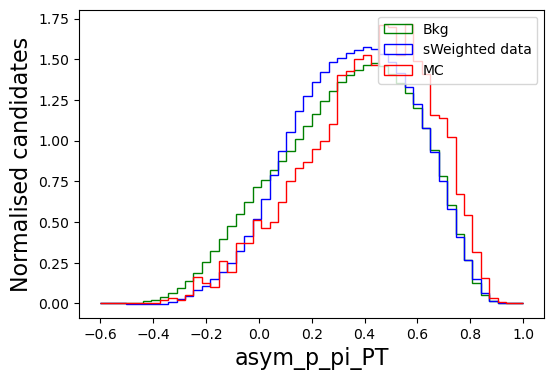

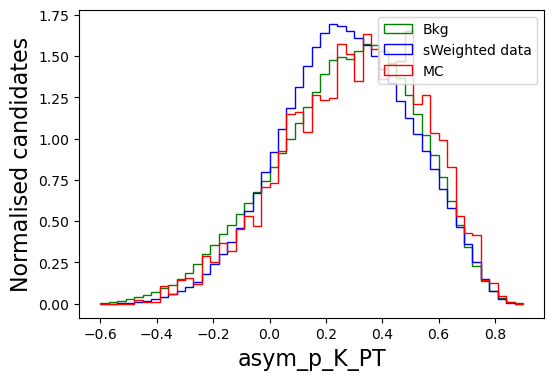

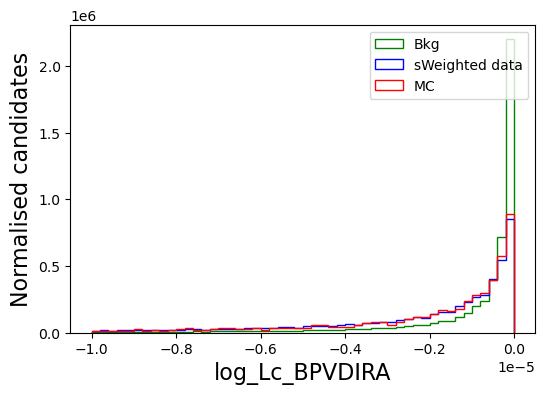

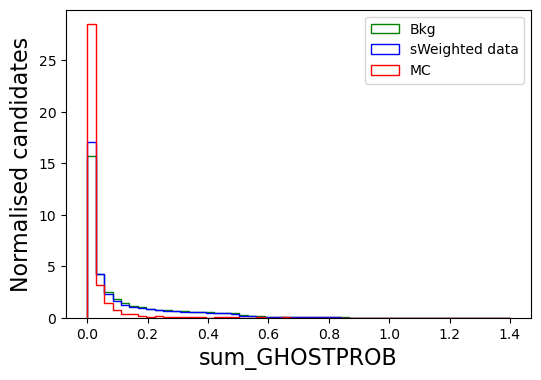

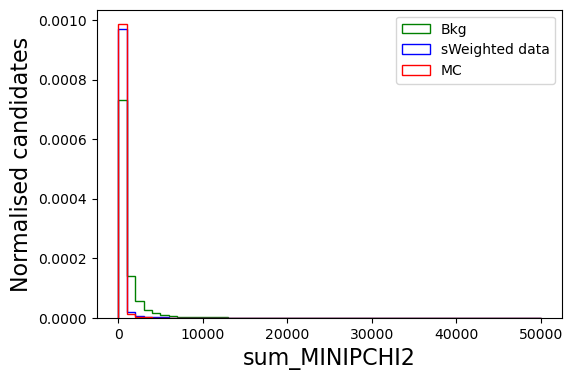

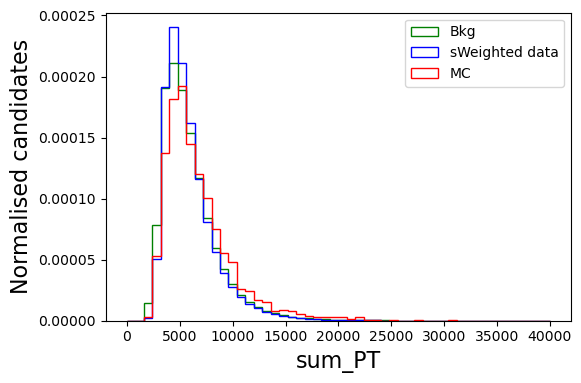

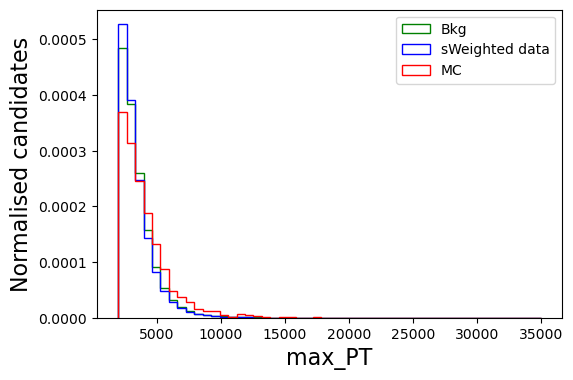

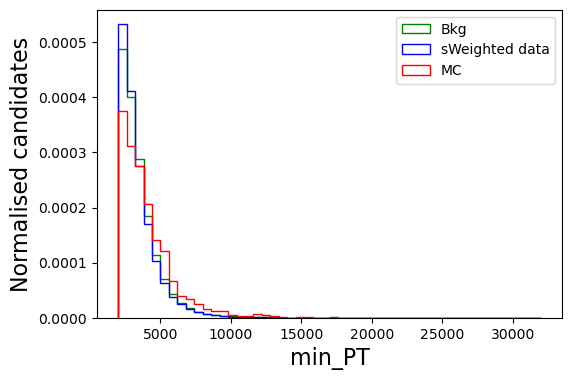

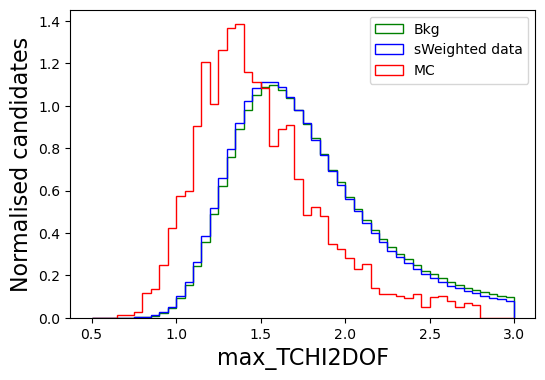

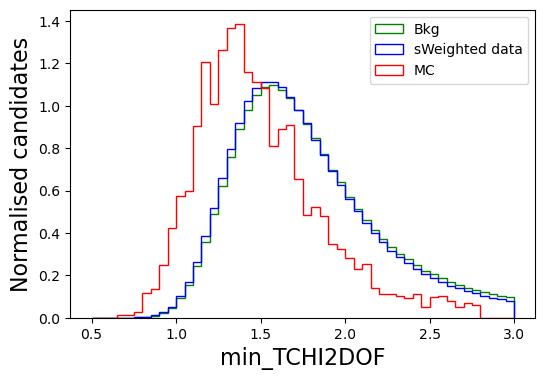

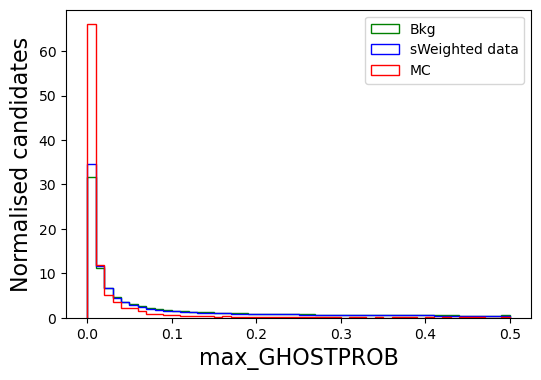

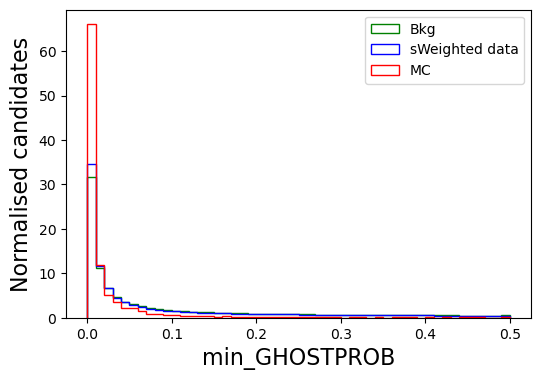

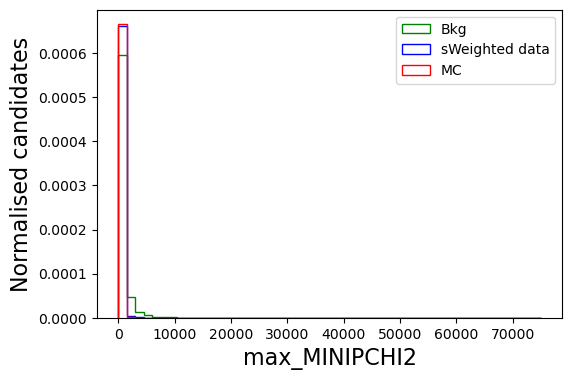

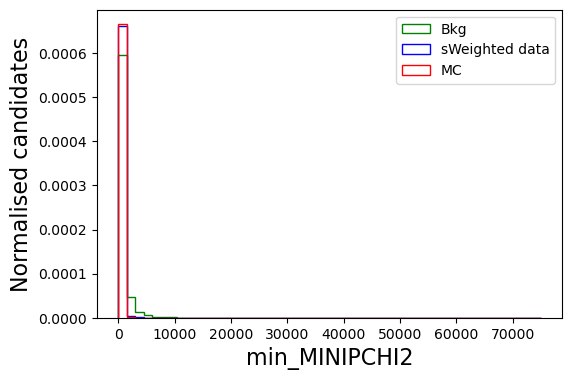

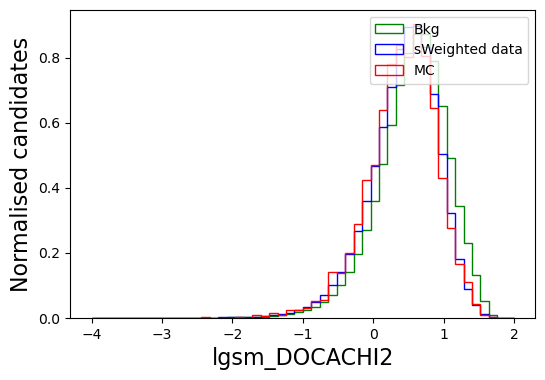

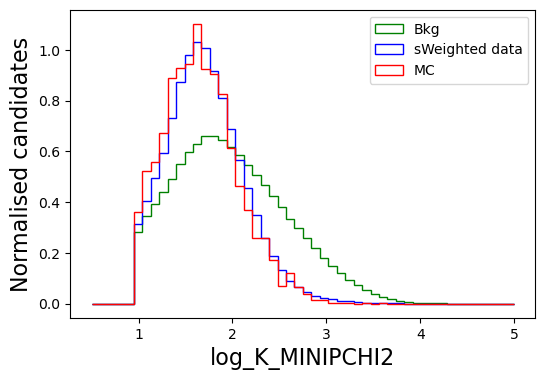

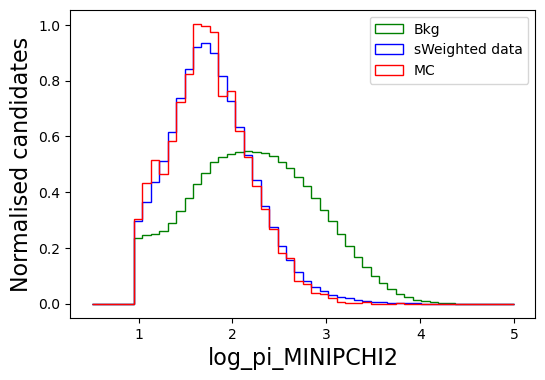

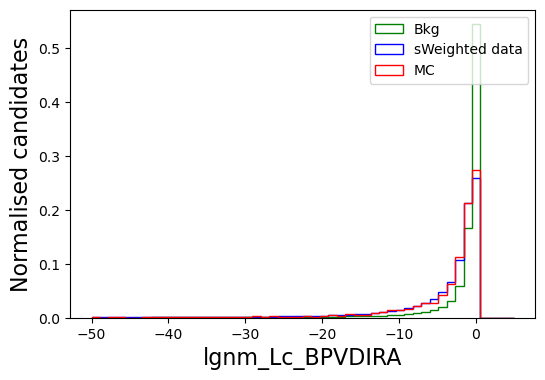

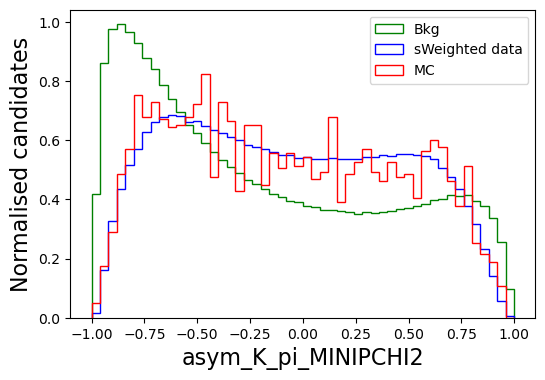

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ranges = {
    "Lc_M": (2230, 2340),
    "p_TCHI2DOF": (0, 3),
    "pi_TCHI2DOF": (0, 3),
    "K_TCHI2DOF": (0, 3),
    "p_GHOSTPROB": (0, 0.5),
    "pi_P": (0, 150e3),
    "p_MINIPCHI2": (0, 75e3),
    "Lc_CHI2": (0, 30),
    "Lc_BPVFDCHI2": (0, 0.5),
    "p_PT": (2e3, 30e3),
    "pi_PT": (2e3, 17.5e3),
    "K_PT": (2e3, 20e3),
    "Lc_BPVDIRA": (0.95, 1),
    "p_PID_P": (-50, 250),
    "pi_GHOSTPROB": (0, 0.5),
    'K_GHOSTPROB': (0, 0.5),
    'Lc_DOCACHI2_12': (0, 15),
    'Lc_DOCACHI2_13': (0, 15),
    'Lc_DOCACHI2_23': (0, 15),
    'pi_MINIPCHI2': (0, 50e3),
    'K_MINIPCHI2': (0, 50e3),
    'sum_TCHI2DOF': (0, 9),
    'log_p_MINIPCHI2': (0.5, 5),
    'log_pi_MINIPCHI2': (0.5, 5),
    'log_K_MINIPCHI2': (0.5, 5),
    'log_Lc_BPVFDCHI2': (1.8, 7),
    'asym_p_pi_PT': (-0.6, 1),
    'asym_p_K_PT': (-0.6, 0.9),
    'log_Lc_BPVDIRA': (-0.00001, 0.0),
    'sum_GHOSTPROB': (0, 1.4),
    'sum_MINIPCHI2': (0, 50e3),
    'sum_PT': (0, 40e3),
    'max_PT': (2e3, 35e3),
    'min_PT': (2e3, 32e3),
    'max_TCHI2DOF': (0.5, 3),
    'min_TCHI2DOF': (0.5, 3),
    'max_GHOSTPROB': (0, 0.5),
    'min_GHOSTPROB': (0, 0.5),
    'max_MINIPCHI2': (0, 75e3),
    'min_MINIPCHI2': (0, 75e3),
    'lgsm_DOCACHI2': (-4, 2),
    'lgnm_Lc_BPVDIRA': (-50, 5),
    "asym_p_K_MINIPCHI2": (-1, 1),
    "asym_p_pi_MINIPCHI2": (-1, 1),
    "asym_K_pi_MINIPCHI2": (-1, 1),
}

for var in data.columns:
    
    if var == "sweight":
        continue
    
    theRange = ranges[var]
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(data.query("((Lc_M>2340) | (Lc_M<2230))")[var], bins=50, range=theRange, color='g', density=True, histtype='step', label='Bkg')
    ax.hist(data[var], bins=50, range=theRange, color='b', weights=data["sweight"], density=True, histtype='step', label="sWeighted data")
    ax.hist(mc[var], bins=50, range=theRange, color='r', density=True, histtype='step', label='MC')
    ax.legend(loc='best')
    ax.set_xlabel(var, fontsize=16)
    ax.set_ylabel("Normalised candidates", fontsize=16)
    #ax.set_yscale("log")
        

The first attempt at a BDT used the variables ```p_GHOSTPROB``` and ```p_TCHI2DOF```. The former had a high importance in the training. 

However, clearly the MC is getting the distribution of these variables wrong, since they do not agree well with the sweighted data.

So, although the training output and performance appeared good, the BDT did not perform well on data.

A second attempt at training uses variables which are discriminating between signal and background and show a good agreement between data and MC agreement.